In [1]:
import astropy.constants as const

In [2]:
import numpy as np

In [3]:
import astropy.units as u

In [4]:
import scipy as sp

In [5]:
from scipy.integrate import odeint

In [6]:
import matplotlib.pyplot as plt

1(a) Derive the equation for the mass gradient $\frac{dM_{r}}{dr}$:
$$M_{r} = \frac{4\pi}{3}\rho r^{3}$$
$$\frac{dM_{r}}{dr} = 4 \pi r^{2} \rho dr$$

1(b) Write down the equation for the pressure gradient assuming hydrostatic equilibrium:
$$\frac{dP}{dr} = \frac{-G M_{r} \rho}{r^{2}}$$
$$\frac{dP}{dr} = -\frac{4\pi}{3} G \rho^{2} r$$


1(c) Derive the equation for the luminosity gradient as a function of $\epsilon$, the energy production rate per unit mass.
$$ \epsilon = \epsilon_{pp} + \epsilon_{CNO}$$
Therefore $L = \epsilon M$
$$L = \frac{4 \pi}{3} \rho \epsilon r^{3}$$
$$\frac{dL}{dr} = 4 \pi r^{2} \rho \epsilon$$

1(d) Write down the temperature gradient:
    $$\frac{dT}{dr} = -\frac{3}{4 a c}\frac{\kappa \rho}{T^{3}}\frac{L}{4 \pi r^{2}}$$

1(e) Write down the four boundary condition for the above equations:
    \\
    We know the boundary conditions for the mass and luminosity:
    $$M(r = 0) = 0$$
$$M(r = R_{sun}) = M_{sun}$$
$$L(r = 0) = 0$$
$$L(r = R_{sun}) = L_{sun}$$
We also can set the initial conditions for the tempurature and pressure:
$$T(r = 0) = T_{c}$$
$$P(r = 0) = P_{c}$$

1(f)
Not all of the values for the condition $r = 0$ are known. To find $T_{c}$ and $P_{c}$ we can guess different values until the profiles for the star look reasonable, or the star doesn't implode or explode. For this program I will be using values of $T_{c}$ and $P_{c}$ for the sun found from the graphs on the second page of the assignment.

1(g) Play with the predator-prey example:

In [7]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

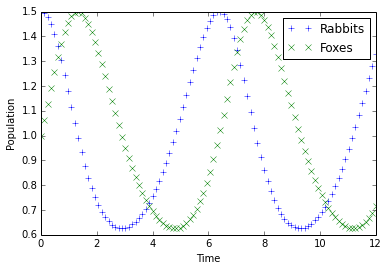

In [8]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

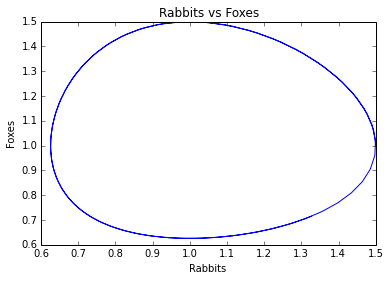

In [9]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

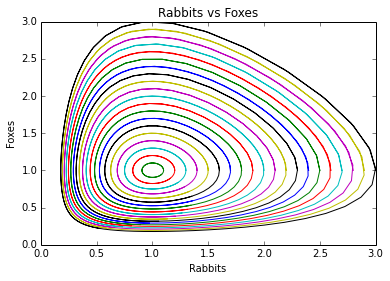

In [10]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

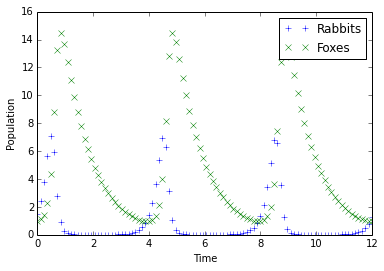

In [11]:
#change some of the variables
a,b,c,d = 5,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

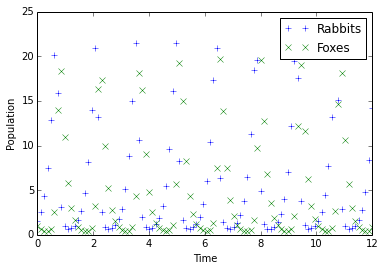

In [12]:
a,b,c,d = 5,1,6,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

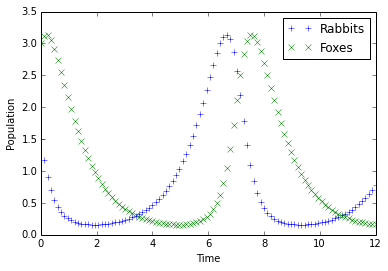

In [ ]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 3.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

1(h)

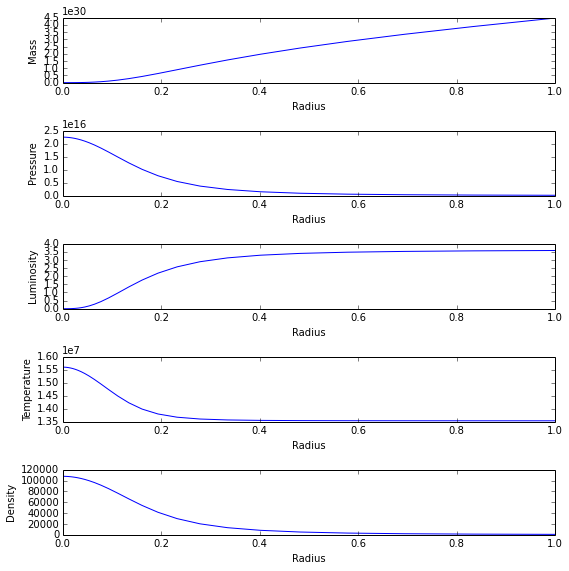

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const

#initial conditions    
m0 = 0.0
p0 = 2.25e16
l0 = 0.0
t0 = 15.6e6
y0 = [m0, p0, l0, t0]

#define constants:
R = 1.38e-23/1.67382e-27
c = 3.00e8
a = 7.565e-16
Rsun = 6.957e8

#number densities of the particles in the sun
X = 0.7
Y = 0.28
Z = 0.02
mu = 1./(2.*X + (3./4.)*Y + (1./2.)*Z)

#define functions
def rho(y):
    Mr, P, Lr, T = y
    return (P - (a/3.)*(T**4.))*mu/(R*T)

def epsilon(y):
    Mr, P, Lr, T = y
    epp = 1.08e-12*rho(y)*(.64**2.)*((T/1.e6)**4.)
    ecno = 8.24e-31*rho(y)*.64*.015*((T/1.e6)**19.9)
    return epp+ecno

def kappa(y):
    Mr, P, Lr, T = y
    kbf = 4.3e20*Z*(1+X)*rho(y)/(T**3.5)
    kff = 3.7e17*(1-Z)*(1+X)*rho(y)/(T**3.5)
    ke = 0.02*(1+X) 
    return (kbf+kff+ke)/3.

#derivative functions
def dmdr(y,r):
    Mr, P, Lr, T = y 
    return 4*np.pi*r**2.*rho(y)

def dpdr(y,r):
    Mr, P, Lr, T = y
    return -const.G.value*Mr*rho(y)/(r**2.)

def dldr(y,r):
    Mr, P, Lr, T = y
    return 4*np.pi*r**2.*rho(y)*epsilon(y)

#kappa = 0.1
def dtdr(y,r):
    Mr, P, Lr, T = y
    return ((-3.)/(4.*a*c))*kappa(y)*(rho(y)/(T**3.))*Lr/(4.*np.pi*(r**2.))

#define r range
rlimits = np.logspace(1.0, np.log10(Rsun), 100)

#find the derivatives
def f(y,r):
    Mr, P, Lr, T = y  
    derivs = [dmdr(y,r), dpdr(y,r), dldr(y,r), dtdr(y,r)]
    return derivs

soln = odeint(f, y0, rlimits, mxstep=5000)

#plot density:
rho0 = rho(y0)
rhoSoln = np.zeros((len(soln)))
for i in range(len(soln)):
    rhoSoln[i] = rho(soln[i, :])
        
# Plot results
fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(511)
ax1.plot(rlimits/Rsun, soln[:,0])
ax1.set_xlabel('Radius (r/Rsun)')
ax1.set_ylabel('Mass')
ax1.set_xlim([0,1])

ax2 = fig.add_subplot(512)
ax2.plot(rlimits/Rsun, soln[:,1])
ax2.set_xlabel('Radius (r/Rsun)')
ax2.set_ylabel('Pressure')

ax3 = fig.add_subplot(513)
ax3.plot(rlimits/Rsun, soln[:,2]/const.L_sun.value)
ax3.set_xlabel('Radius (r/Rsun)')
ax3.set_ylabel('Luminosity')

ax4 = fig.add_subplot(514)
ax4.plot(rlimits/Rsun, soln[:,3])
ax4.set_xlabel('Radius (r/Rsun)')
ax4.set_ylabel('Temperature')

ax5 = fig.add_subplot(515)
ax5.plot(rlimits/Rsun, rhoSoln)
ax5.set_xlabel('Radius (r/Rsun)')
ax5.set_ylabel('Density')

plt.tight_layout()
plt.show()

1(i) My results are generally very close to figure 1. The mass is within one order of magnitude of the mass of the Sun and increases slowly at first and then more rapidly in the middle. My pressure drops off steeply at first and then flattens out for r/Rsun > 0.4. My luminosity rises steeply and then flattens out at around r/Rsun = 0.3, which is slightly later than the graph in Figure 1. My temperature graph is very similar to my pressure graph except that it falls off more steeply - this contradicts the graph of temperature and pressure in Figure 1. This difference could be because I am using an approximation for $\kappa$. Finally, my density function starts off high and falls steeply before levelling out for r/Rsun > 0.3, which is very similar to the graph in Figure 1. Overall, while my results are not perfect they are very close. The differences most likely come from approximations in $\kappa$ and finding temperature from radiation only. 